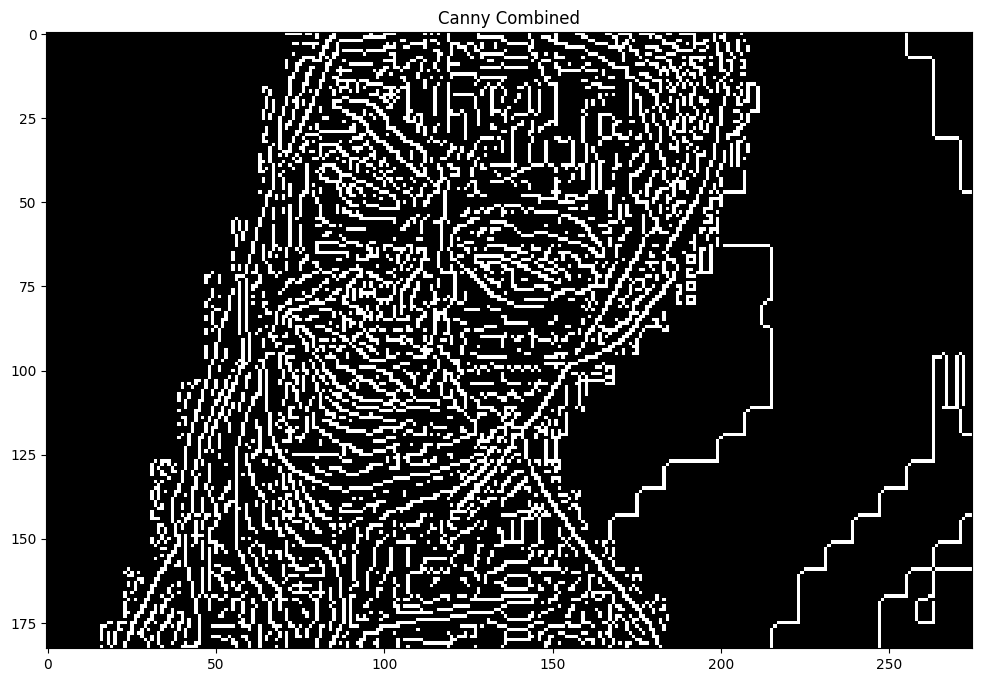

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(r"aaa.jpeg", 0)




canny_x = cv2.Canny(img, cv2.CV_64F, 1, 0)
canny_y = cv2.Canny(img, cv2.CV_64F, 0, 1)

plt.figure(figsize=(12, 8))


plt.subplot(1, 1, 1)
plt.title("Canny Combined")
plt.imshow(np.sqrt(canny_x**1 + canny_y**1), cmap='gray')

plt.show()


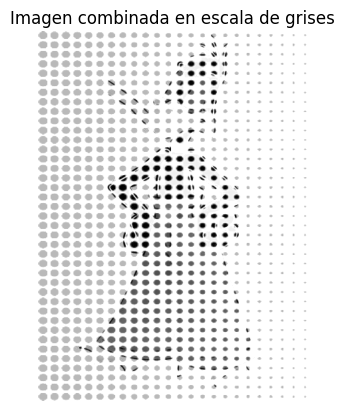

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

PatoLucas = cv2.imread(r'Lucas.jpg')
PatoLucasGris = cv2.cvtColor(PatoLucas, cv2.COLOR_BGR2GRAY)
Puntos = cv2.imread(r"PuntosLucas.png")
PuntosGris = cv2.cvtColor(Puntos, cv2.COLOR_BGR2GRAY)
PuntosGris = cv2.resize(PuntosGris, (PatoLucasGris.shape[1], PatoLucasGris.shape[0]))
Combinacion = cv2.addWeighted(PatoLucasGris, 1, PuntosGris, 1, 0)
plt.imshow(Combinacion, cmap='gray')
plt.title('Imagen combinada en escala de grises')
plt.axis('off')
plt.show()



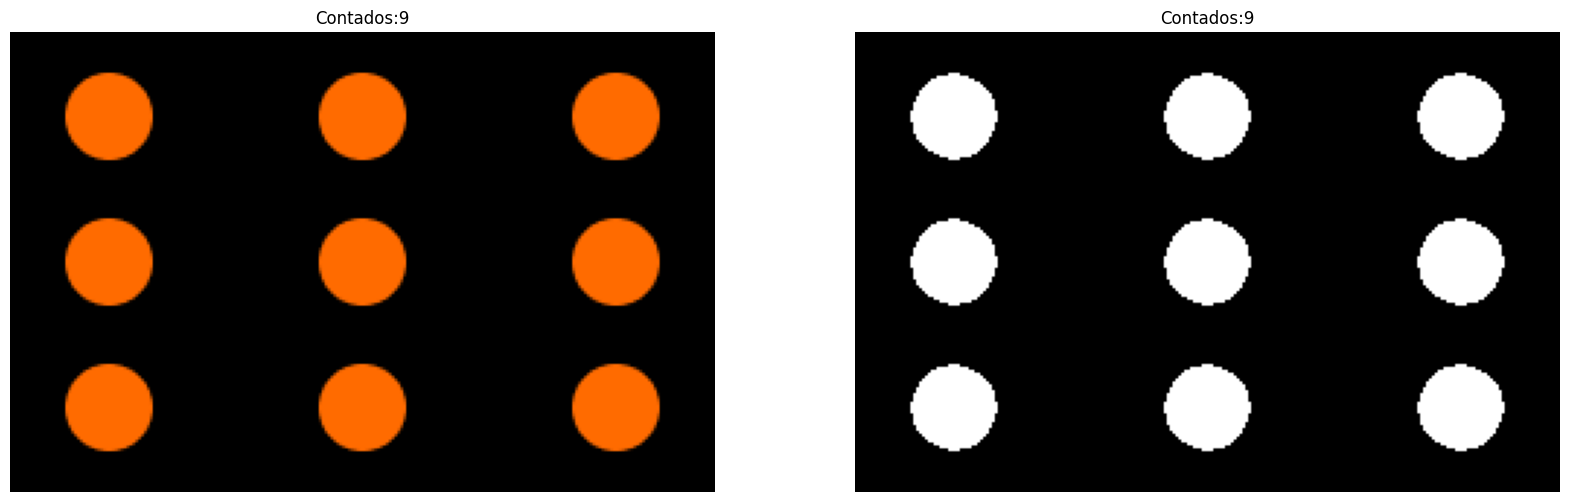

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contar (img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _,binaria = cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)
    borde,_ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cont = len(borde)
    return cont, binaria

imagen = cv2.imread('ppppp.png')

cont, img_bin = contar(imagen)

plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title(f'Contados:{cont}')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_bin, cv2.COLOR_BGR2RGB))
plt.title(f'Contados:{cont}')
plt.axis('off')
plt.show()

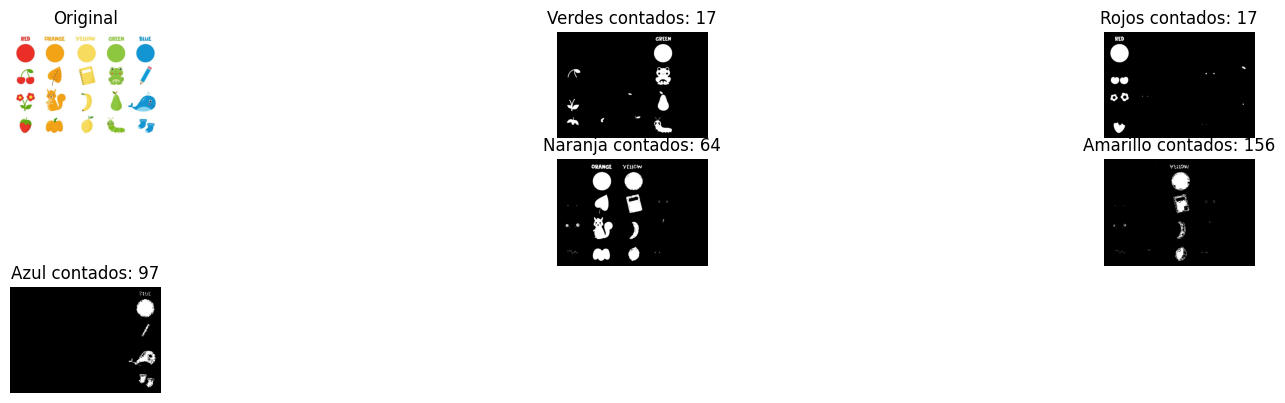

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contar_verdes_rojos(img):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    verde_bajo = np.array([35, 100, 100])
    verde_alto = np.array([85, 255, 255])
    rojo_bajo1 = np.array([0, 100, 100])
    rojo_alto1 = np.array([10, 255, 255])
    rojo_bajo2 = np.array([160, 100, 100])
    rojo_alto2 = np.array([180, 255, 255])
    naranja_bajo = np.array([10, 100, 100])
    naranja_alto = np.array([25, 255, 255])
    amarillo_bajo = np.array([25, 100, 100])
    amarillo_alto = np.array([35, 255, 255])
    azul_bajo = np.array([100, 100, 100])
    azul_alto = np.array([130, 255, 255])


    mascara_naranja = cv2.inRange(img_hsv, naranja_bajo, naranja_alto)
    mascara_amarillo = cv2.inRange(img_hsv, amarillo_bajo, amarillo_alto)
    mascara_azul = cv2.inRange(img_hsv, azul_bajo, azul_alto)
    mascara_verde = cv2.inRange(img_hsv, verde_bajo, verde_alto)
    mascara_rojo1 = cv2.inRange(img_hsv, rojo_bajo1, rojo_alto1)
    mascara_rojo2 = cv2.inRange(img_hsv, rojo_bajo2, rojo_alto2)
    mascara_rojo = cv2.bitwise_or(mascara_rojo1, mascara_rojo2)

    contornos_verde, _ = cv2.findContours(mascara_verde, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contornos_rojo, _ = cv2.findContours(mascara_rojo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contornos_naranja, _ = cv2.findContours(mascara_naranja, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contornos_amarillo, _ = cv2.findContours(mascara_amarillo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contornos_azul, _ = cv2.findContours(mascara_azul, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    
    cont_verde = len(contornos_verde)
    cont_rojo = len(contornos_rojo)
    cont_naranja = len(contornos_naranja)
    cont_amarillo = len(contornos_amarillo)
    cont_azul = len(contornos_azul)



    
    return cont_verde, cont_rojo, mascara_verde, mascara_rojo, cont_naranja, cont_amarillo, cont_azul, mascara_naranja, mascara_amarillo, mascara_azul


imagen = cv2.imread('Objetos.jpg')

cont_verde, cont_rojo, img_bin_verde, img_bin_rojo, cont_naranja, cont_amarillo, cont_azul, img_bin_naranja, img_bin_amarillo, img_bin_azul = contar_verdes_rojos(imagen)

# Mostrar resultados
plt.figure(figsize=(20, 8))

plt.subplot(531)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title(f'Original')
plt.axis('off')

plt.subplot(532)
plt.imshow(img_bin_verde, cmap='gray')
plt.title(f'Verdes contados: {cont_verde}')
plt.axis('off')

plt.subplot(533)
plt.imshow(img_bin_rojo, cmap='gray')
plt.title(f'Rojos contados: {cont_rojo}')
plt.axis('off')



plt.subplot(535)
plt.imshow(img_bin_naranja, cmap='gray')
plt.title(f'Naranja contados: {cont_naranja}')
plt.axis('off')

plt.subplot(536)
plt.imshow(img_bin_amarillo, cmap='gray')
plt.title(f'Amarillo contados: {cont_amarillo}')
plt.axis('off')

plt.subplot(537)
plt.imshow(img_bin_azul, cmap='gray')
plt.title(f'Azul contados: {cont_azul}')
plt.axis('off')

plt.show()




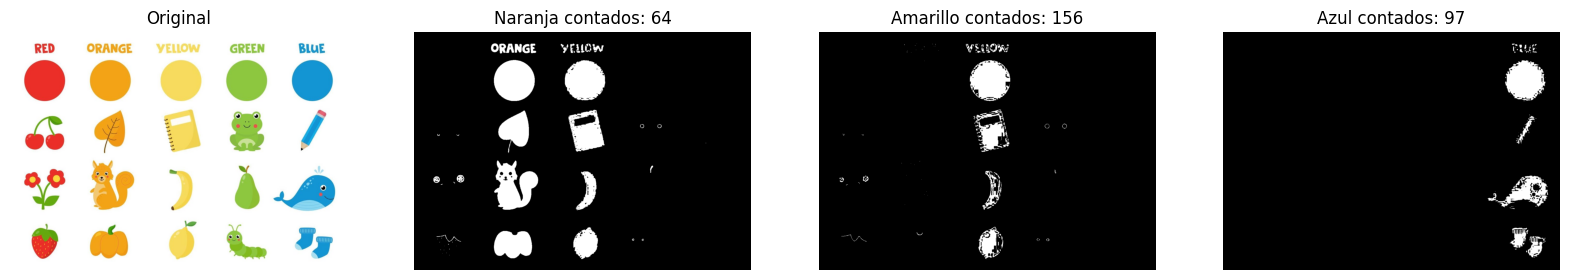